In [1]:
import sys
import numpy as np
import os
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
import napari
from tifffile import imread
import napatrackmater.bTrackmate as TM

In [2]:
#Trackmate writes an XML file of tracks, we use it as input
xml_path = '/home/sancere/Downloads/CellTracking/DUP_Raw.xml' 
#Path to Segmentation image for extracting any track information from labels 
SegmentationImage = '/home/sancere/Downloads/CellTracking/SEG.tif'
#Path to Raw image to display the tracks on (optional) else set it to None
RawImage = None #'/home/kapoorlab/Downloads/CellTracking/Raw.tif'
savedir = '/home/sancere/Downloads/CellTracking/save/'

MaskImage = None

In [6]:
Seg = imread(SegmentationImage).astype('uint16')
if RawImage is not None:
  ImageName = os.path.basename(os.path.splitext(RawImage)[0])
  Raw = imread(RawImage).astype('float16')
  
else:
  Raw = None   
  ImageName = os.path.basename(os.path.splitext(SegmentationImage)[0]) 
if MaskImage is not None:
    Mask = imread(MaskImage)
else:
    
    Mask = np.zeros_like(Seg)
    Mask[:,:,50:Mask.shape[2]-50,50:Mask.shape[3]-50] = 1
    #Mask = None
   

In [7]:
all_track_properties, calibration = TM.import_TM_XML(xml_path, Seg, image = RawImage, Mask = Mask)


100%|██████████| 177/177 [06:43<00:00,  2.28s/it]


TrackID 0
Is a Dividing track: True
TrackID 1
Is a Dividing track: True
TrackID 2
Is a Dividing track: True
TrackID 3
Is a Dividing track: True
TrackID 4
Is a Dividing track: True
TrackID 5
Is a Dividing track: True
TrackID 6
Is a Dividing track: True


# Visualize Dividing tracks

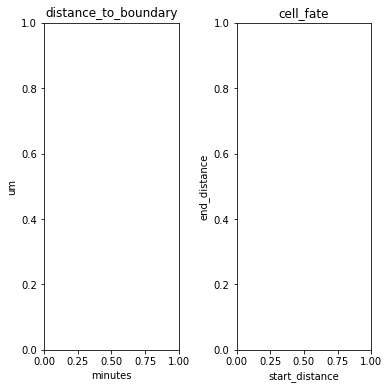

In [8]:
TM.TrackMateLiveTracks(Raw, Seg, Mask,savedir, calibration,  all_track_properties, True)

# Visualize Non Dividing tracks

In [ ]:
 TM.TrackMateLiveTracks(Raw, Seg, Mask,savedir, calibration, all_track_properties, False)